In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Read data from file
df=pd.read_csv('epa-sea-level.csv')

In [3]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [4]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


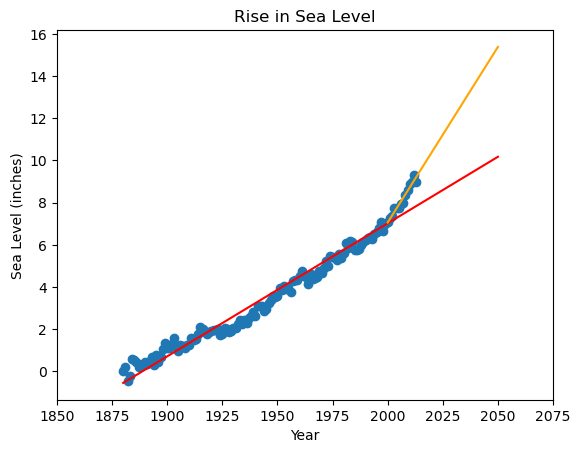

<Figure size 640x480 with 0 Axes>

In [76]:
# Create scatter plot
fig, ax=plt.subplots()
ax.scatter=plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
# Create second line of best fit
fit = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
extend=np.arange(1880, 2051, 1)
line = [fit.slope*xi + fit.intercept for xi in extend]
plt.plot(extend, line, color = 'red')
# Create second line of best fit
new_df=df.loc[df['Year'] >= 2000]
new_fit = linregress(new_df['Year'], new_df['CSIRO Adjusted Sea Level'])
new_extend=np.arange(2000, 2051, 1)
new_line = [new_fit.slope*xi + new_fit.intercept for xi in new_extend]
plt.plot(new_extend, new_line, color = 'orange')
plt.xticks(range(1850, 2100, 25))
# Add labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Sea Level (inches)")
ax.set_title("Rise in Sea Level")
plt.show()
plt.savefig('sea_level_plot.png')